Dataset loaded successfully.

--- Testing the Recommendation System ---

Recommendations for a user who likes 'North Indian' in price range 3:
                Restaurant Name                               Cuisines  \
2414            Barbeque Nation                  North Indian, Chinese   
2307  AB's - Absolute Barbecues  European, Mediterranean, North Indian   
2495            Mirchi And Mime    North Indian, South Indian, Mughlai   
2409            Barbeque Nation                  North Indian, Chinese   
822   AB's - Absolute Barbecues  North Indian, European, Mediterranean   

      Aggregate rating  Price range  
2414               4.9            3  
2307               4.9            3  
2495               4.9            3  
2409               4.9            3  
822                4.9            3  

Recommendations for a user who likes 'Italian' in price range 2:
          Restaurant Name                                           Cuisines  \
6997  Echoes Satyaniketan  Cafe, Conti

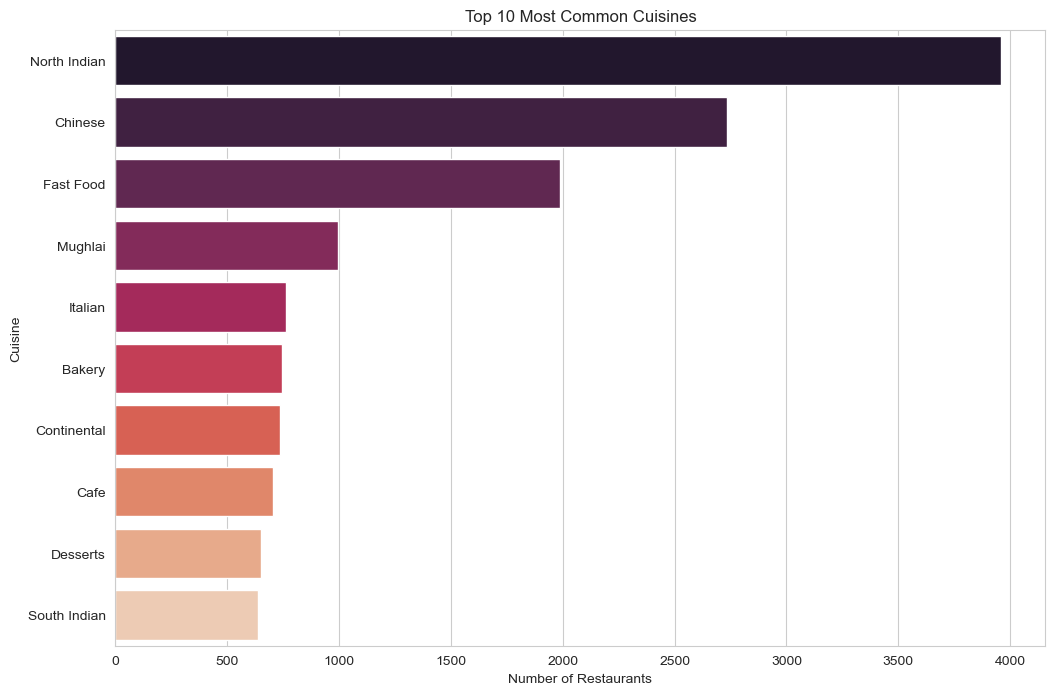

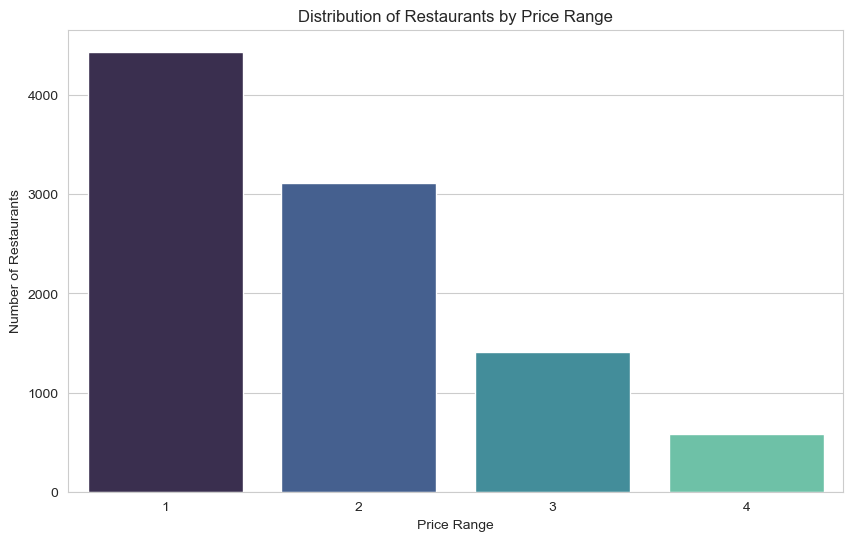

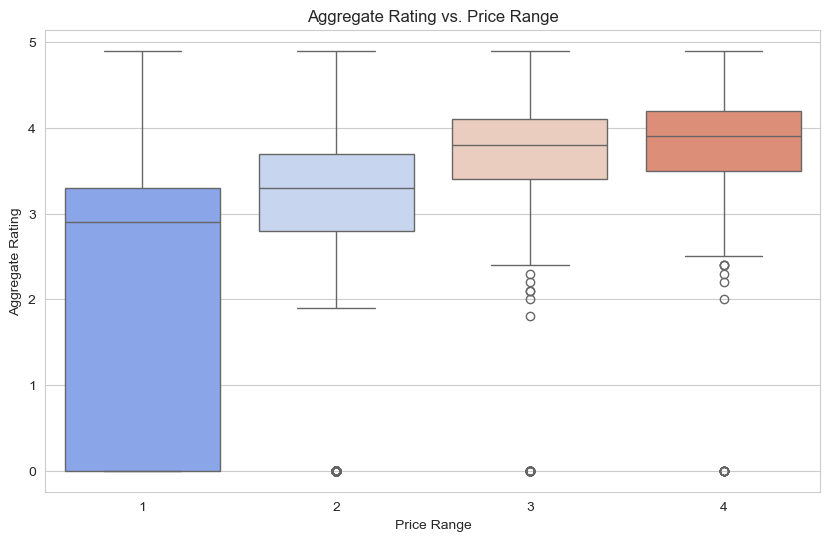


--- Recommendation Quality Evaluation ---
Relevance Score for Test Case 1 (North Indian, Price Range 3): 1.0
Relevance Score for Test Case 2 (Italian, Price Range 2): 1.0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# --- Hide Future Warnings ---
warnings.simplefilter(action='ignore', category=FutureWarning)

# --- 1. Load and Preprocess the Data ---

try:
    df = pd.read_csv('Dataset .csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Dataset .csv' not found. Using a sample dataset for demonstration.")
    data = {
        'Restaurant Name': [f'Restaurant {i}' for i in range(20)],
        'Cuisines': [
            'North Indian, Mughlai', 'Italian', 'Chinese', 'South Indian',
            'Continental', 'Mexican', 'Thai', 'North Indian, Chinese',
            'Italian, Pizza', 'Fast Food', 'Bakery', 'Cafe, Fast Food',
            'American, Burger', 'Asian', 'Mughlai', 'South Indian, North Indian',
            'Continental, Cafe', 'Mexican, Italian', 'Chinese, Thai', 'Desserts, Bakery'
        ],
        'Price range': [3, 2, 4, 1, 3, 2, 4, 3, 2, 1, 1, 2, 3, 4, 3, 1, 2, 2, 3, 1],
        'Aggregate rating': [4.5, 3.8, 4.2, 3.5, 4.0, 3.9, 4.8, 4.1, 4.3, 3.2, 3.6, 3.7, 4.4, 4.6, 4.0, 3.4, 4.1, 3.9, 4.3, 3.8],
        'Votes': [100, 50, 200, 80, 150, 90, 250, 120, 180, 30, 40, 60, 170, 220, 110, 70, 130, 100, 190, 45]
    }
    df = pd.DataFrame(data)

# Clean up column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Handle missing values, especially in 'Cuisines'
df.dropna(subset=['Cuisines', 'Restaurant Name'], inplace=True)


# --- 2. Recommendation System Implementation ---

def recommend_restaurants(data, cuisine_pref, price_range_pref, top_n=5):
    """
    Recommends restaurants based on user preferences for cuisine and price range.

    Args:
        data (pd.DataFrame): The restaurant dataset.
        cuisine_pref (str): The user's preferred cuisine.
        price_range_pref (int): The user's preferred price range (1, 2, 3, or 4).
        top_n (int): The number of recommendations to return.

    Returns:
        pd.DataFrame: A DataFrame of recommended restaurants.
    """
    # Filter by price range
    recommendations = data[data['Price range'] == price_range_pref].copy()

    # Filter by cuisine - case-insensitive search
    recommendations = recommendations[
        recommendations['Cuisines'].str.contains(cuisine_pref, case=False)
    ]

    # Sort the results by rating and votes for better quality recommendations
    recommendations.sort_values(by=['Aggregate rating', 'Votes'], ascending=[False, False], inplace=True)

    return recommendations.head(top_n)

# --- 3. Testing the Recommendation System ---

print("\n--- Testing the Recommendation System ---")

# Example 1: User looking for a mid-range North Indian restaurant
user_prefs_1 = {
    'cuisine': 'North Indian',
    'price_range': 3
}
recommendations_1 = recommend_restaurants(df, user_prefs_1['cuisine'], user_prefs_1['price_range'])
print(f"\nRecommendations for a user who likes '{user_prefs_1['cuisine']}' in price range {user_prefs_1['price_range']}:")
print(recommendations_1[['Restaurant Name', 'Cuisines', 'Aggregate rating', 'Price range']])

# Example 2: User looking for an affordable Italian restaurant
user_prefs_2 = {
    'cuisine': 'Italian',
    'price_range': 2
}
recommendations_2 = recommend_restaurants(df, user_prefs_2['cuisine'], user_prefs_2['price_range'])
print(f"\nRecommendations for a user who likes '{user_prefs_2['cuisine']}' in price range {user_prefs_2['price_range']}:")
print(recommendations_2[['Restaurant Name', 'Cuisines', 'Aggregate rating', 'Price range']])


# --- 4. Visualizations for Data Insights ---

sns.set_style('whitegrid')

# Graph 1: Top 10 Most Common Cuisines
plt.figure(figsize=(12, 8))
# Process cuisines: split string and count each one
cuisine_counts = df['Cuisines'].str.split(', ').explode().value_counts()
sns.barplot(x=cuisine_counts.head(10).values, y=cuisine_counts.head(10).index, palette='rocket')
plt.title('Top 10 Most Common Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.savefig('top_cuisines.png')

# Graph 2: Number of Restaurants in Each Price Range
plt.figure(figsize=(10, 6))
sns.countplot(x='Price range', data=df, palette='mako')
plt.title('Distribution of Restaurants by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.savefig('price_range_distribution.png')

# Graph 3: Relationship between Price Range and Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette='coolwarm')
plt.title('Aggregate Rating vs. Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.savefig('rating_vs_price.png')

print("\nGenerated all plots successfully!")
plt.show()

# --- 5. "Performance Metric" for Recommendation Quality ---

def evaluate_recommendations(recommendations, cuisine_pref, price_range_pref):
    """
    A simple "metric" to check the relevance of recommendations.
    """
    if recommendations.empty:
        return 0.0

    # Check if the recommended price range is correct
    price_match = recommendations['Price range'].eq(price_range_pref).all()

    # Check if the recommended cuisine is present
    cuisine_match = recommendations['Cuisines'].str.contains(cuisine_pref, case=False).all()

    # Simple relevance score: 1.0 if all match, 0.0 otherwise
    if price_match and cuisine_match:
        return 1.0
    else:
        return 0.0

# Evaluate the test cases
relevance_1 = evaluate_recommendations(recommendations_1, user_prefs_1['cuisine'], user_prefs_1['price_range'])
relevance_2 = evaluate_recommendations(recommendations_2, user_prefs_2['cuisine'], user_prefs_2['price_range'])

print("\n--- Recommendation Quality Evaluation ---")
print(f"Relevance Score for Test Case 1 (North Indian, Price Range 3): {relevance_1}")
print(f"Relevance Score for Test Case 2 (Italian, Price Range 2): {relevance_2}")